In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import logging
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pandas as pd
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

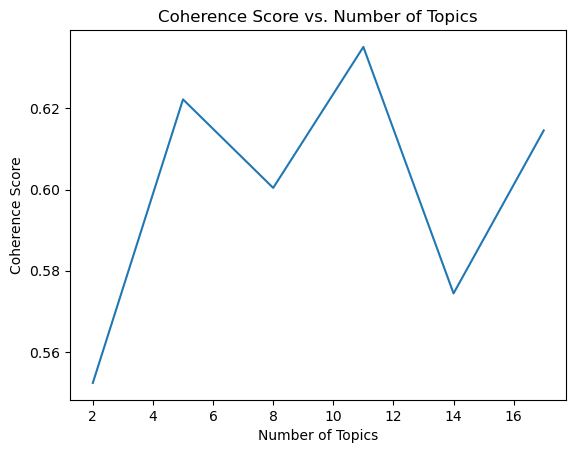

Optimal number of topics: 11
Topic 0:
, Food, Ingredient, Tableware, Cuisine, Dishware, Table, Recipe, Plate, Serveware, Dish, Smile, Publication, Book, Drinkware, Cup, Happy, Natural foods, Leisure, Cake, Baked goods, Fruit, Shelf, Red, Plant

Topic 1:
, Sky, Travel, Building, Plant, Cloud, Leisure, Tree, Happy, People in nature, Water, Window, Smile, Flash photography, Fun, Standing, Road surface, Sleeve, Event, Eyewear, City, Waist, Tints and shades, Thigh, Grass

Topic 2:
, Waist, Fashion design, Sleeve, Plant, Dress, Thigh, One-piece garment, Smile, Shoulder, Happy, Flash photography, Textile, Pink, Flooring, Fashion, Gown, Formal wear, Purple, Event, Leisure, Neck, Joint, Flower, Water

Topic 3:
, Sleeve, Waist, Shoulder, Neck, Flash photography, Smile, Fashion design, Thigh, Joint, Happy, Gesture, Eyelash, Eyewear, Knee, Skin, Lip, Leg, Hair, Arm, Shoe, Hairstyle, Human body, Fashion, Vision care

Topic 4:
, Smile, Interior design, Happy, Event, Comfort, Leisure, Font, Flash pho

In [27]:
df = pd.read_csv('Shortlisted_Influencer_Posts_With_Labels.csv')
df = df[df['author_name'].isin(['sahilkhan', 'taramilktea', 'masoomminawala','diipakhosla','aashnashroff', 'yasminkarachiwala', 'shwetarohira', 'houseofmisu', 'akanksharedhu', 'kayaancontractor'])]

def preprocess_data(df):
    """
    Preprocesses the data by creating a bag-of-words representation.
    
    Args:
    df (pandas.DataFrame): DataFrame containing 'post_id' and 'labels' columns
    
    Returns:
    posts (pandas.DataFrame): DataFrame containing 'post_id' and concatenated 'labels'
    """
    posts = df.groupby('post_id')['labels'].apply(lambda x: ','.join(x)).reset_index()

    return posts

def perform_lda(labels_list, num_topics=10):
    """Performs LDA topic modeling."""
    dictionary = corpora.Dictionary(labels_list)
    corpus = [dictionary.doc2bow(text) for text in labels_list]

    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, passes=10, alpha='auto', per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=labels_list, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()

    return lda_model, dictionary, corpus, coherence

def find_optimal_topics(labels_list, start=2, limit=20, step=3):
    """Determines the optimal number of topics for LDA."""
    coherence_values = []
    model_list = []
    topic_numbers = []  # List to track the number of topics

    for num_topics in range(start, limit, step):
        model, _, _, coherence = perform_lda(labels_list, num_topics=num_topics)
        model_list.append(model)
        coherence_values.append(coherence)
        topic_numbers.append(num_topics)  # Track the number of topics

    # Find the index of the highest coherence value
    max_coherence_idx = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_numbers[max_coherence_idx]  # Get the optimal number of topics

    return model_list, coherence_values, optimal_num_topics  # Return the optimal number of topics as well

# Example usage:
# Assuming you have a DataFrame df with 'post_id' and 'labels' columns
# df = ...

# Preprocess the data
posts = preprocess_data(df)

# Extract the 'labels' column from the preprocessed DataFrame
labels_list = posts['labels'].str.split(',')

# Find optimal number of topics
model_list, coherence_values, optimal_num_topics = find_optimal_topics(labels_list)

# Plot coherence values
plt.plot(range(2, 20, 3), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

print("Optimal number of topics:", optimal_num_topics)

# Create LDA model with optimal number of topics
lda_model, dictionary, corpus, _ = perform_lda(labels_list, num_topics=5)

# Display top words for each cluster
def display_top_words(lda_model, num_words=25):
    """Displays the top words for each topic in a readable format."""
    topics = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    for topic_id, words in topics:
        print(f"Topic {topic_id}:")
        top_words = ", ".join([word for word, _ in words])
        print(top_words)
        print()

display_top_words(lda_model)

def map_topics_to_posts(lda_model, corpus):
    """Maps topics back to each post."""
    post_topic_weights = []  # List to store topic weights for each post
    for doc in corpus:
        topics = lda_model.get_document_topics(doc, minimum_probability=0.0)
        topic_weights = {topic: weight for topic, weight in topics}  # Dictionary to store topic weights for the current post
        post_topic_weights.append(topic_weights)

    return post_topic_weights

# Map topics back to each post with weights
post_topic_weights = map_topics_to_posts(lda_model, corpus)
 



### Instagram Influencer Topic Analysis

In this report, we analyze different categories of influencer posts on Instagram based on the topics extracted from their content.

---

#### Topic 0: Culinary Delights
*Keywords*: Food, Ingredient, Recipe, Cuisine, Plate, Drinkware, Cake, Baked goods, Fruit

This topic revolves around culinary creations, including recipes, dishes, and ingredients. Influencers in this category likely share mouthwatering images of food and beverages, along with cooking tips and recipes.

#### Topic 1: Travel and Exploration
*Keywords*: Sky, Building, Cloud, Tree, Water, City, Leisure, Travel, Adventure

Influencers in this category are likely to post content related to travel, exploration, and outdoor adventures. Their posts may feature breathtaking landscapes, architectural wonders, and glimpses of different cultures and experiences.

#### Topic 2: Fashion and Elegance
*Keywords*: Fashion design, Dress, Smile, Event, Fashion, Gown, Formal wear, Pink, Purple

This topic encompasses influencers who focus on fashion, elegance, and style. Their posts may showcase trendy outfits, glamorous dresses, and fashion-forward looks suitable for various occasions.

#### Topic 3: Beauty and Glamour
*Keywords*: Smile, Fashion design, Flash photography, Eyelash, Skin, Hair, Makeup, Hairstyle

Influencers in this category are likely to share content related to beauty, makeup, and grooming. Their posts may include makeup tutorials, skincare tips, and hairstyling inspiration to help followers enhance their appearance.

#### Topic 4: Interior Design and Lifestyle
*Keywords*: Interior design, Comfort, Leisure, Furniture, Tableware, Decoration, Lighting, Window

This topic covers influencers who focus on interior design, home decor, and lifestyle inspiration. Their posts may feature cozy interiors, stylish furniture, and decor ideas to create inviting living spaces.

---

By understanding these topics, brands and marketers can better tailor their collaborations and campaigns to resonate with the interests and preferences of different influencer audiences on Instagram.

In [28]:
post_topic_weights
# add post_topic_weights to posts DataFrame
posts['topic_weights'] = post_topic_weights
# break each column of topic_weights into 5 columns in the DataFrame
posts = pd.concat([posts, posts['topic_weights'].apply(pd.Series)], axis=1)
# remove topic_weights column
posts = posts.drop(columns=['topic_weights'])
posts.columns = ['post_id', 'labels', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4']
# add to df 
df = df.merge(posts, on='post_id')
df['path'] = df.apply(lambda x: f"Data/{x['post_id']}/{x['image_ID']}", axis=1)
df

,post_id,image_ID,comments_count,likes_count,followers,author_name,caption,date,year,month,day,category,labels_x,labels_y,topic_0,topic_1,topic_2,topic_3,topic_4,path
0,kayaancontractor_100226_2868439159916464863_205_2,2022-06-25_13-43-36_UTC_1.jpg,2,205,0,kayaancontractor,“Got your nose!”🫶🏻 #caturday \n.\n#saturday #l...,2022-06-2,2022,6,2,Core Influencers,"Nose,Glasses,Skin,Lip,Vision care,Eyebrow,Mout...","Nose,Glasses,Skin,Lip,Vision care,Eyebrow,Mout...",0.001435,0.078919,0.003028,0.915151,0.001468,Data/kayaancontractor_100226_28684391599164648...
1,kayaancontractor_100226_2868439159916464863_205_2,2022-06-25_13-43-36_UTC_2.jpg,2,205,0,kayaancontractor,“Got your nose!”🫶🏻 #caturday \n.\n#saturday #l...,2022-06-2,2022,6,2,Core Influencers,"Nose,Glasses,Skin,Hairstyle,Vision care,Facial...","Nose,Glasses,Skin,Lip,Vision care,Eyebrow,Mout...",0.001435,0.078919,0.003028,0.915151,0.001468,Data/kayaancontractor_100226_28684391599164648...
2,kayaancontractor_100226_2868439159916464863_205_2,2022-06-25_13-43-36_UTC_3.jpg,2,205,0,kayaancontractor,“Got your nose!”🫶🏻 #caturday \n.\n#saturday #l...,2022-06-2,2022,6,2,Core Influencers,"Glasses,Vision care,Ear,Jaw,Carnivore,Felidae,...","Nose,Glasses,Skin,Lip,Vision care,Eyebrow,Mout...",0.001435,0.078919,0.003028,0.915151,0.001468,Data/kayaancontractor_100226_28684391599164648...
3,masoomminawala_1355818_3045266610416022503_836...,2023-02-24_13-08-10_UTC_1.jpg,881,83647,0,masoomminawala,🦁,2023-02-2,2023,2,2,Core Influencers,"Face,Fur clothing,Textile,Gesture,Happy,Flash ...","Face,Fur clothing,Textile,Gesture,Happy,Flash ...",0.002138,0.003726,0.004512,0.007415,0.982210,Data/masoomminawala_1355818_304526661041602250...
4,masoomminawala_1355818_3045266610416022503_836...,2023-02-24_13-08-10_UTC_2.jpg,881,83647,0,masoomminawala,🦁,2023-02-2,2023,2,2,Core Influencers,"Font,Terrestrial plant,Symmetry,Darkness,Scien...","Face,Fur clothing,Textile,Gesture,Happy,Flash ...",0.002138,0.003726,0.004512,0.007415,0.982210,Data/masoomminawala_1355818_304526661041602250...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,kayaancontractor_100226_3018217689202415643_65...,2023-01-18_05-26-48_UTC_3.jpg,25,652,0,kayaancontractor,Under the Gliricidia Bloom🌸 \n.\nPhotography: ...,2023-01-1,2023,1,1,Core Influencers,"Sky,Plant,Eye,People in nature,Happy,Grass,Fla...","Hair,Sky,People in nature,Plant,Waist,Flash ph...",0.000865,0.591704,0.001827,0.404718,0.000885,Data/kayaancontractor_100226_30182176892024156...
1072,kayaancontractor_100226_3018217689202415643_65...,2023-01-18_05-26-48_UTC_4.jpg,25,652,0,kayaancontractor,Under the Gliricidia Bloom🌸 \n.\nPhotography: ...,2023-01-1,2023,1,1,Core Influencers,"Sky,People in nature,Sleeve,Waist,Grass,Thigh,...","Hair,Sky,People in nature,Plant,Waist,Flash ph...",0.000865,0.591704,0.001827,0.404718,0.000885,Data/kayaancontractor_100226_30182176892024156...
1073,kayaancontractor_100226_3018217689202415643_65...,2023-01-18_05-26-48_UTC_5.jpg,25,652,0,kayaancontractor,Under the Gliricidia Bloom🌸 \n.\nPhotography: ...,2023-01-1,2023,1,1,Core Influencers,"Sky,Flower,Plant,Ecoregion,People in nature,Tw...","Hair,Sky,People in nature,Plant,Waist,Flash ph...",0.000865,0.591704,0.001827,0.404718,0.000885,Data/kayaancontractor_100226_30182176892024156...
1074,yasminkarachiwala_1062568_2813329952305644743_...,2022-04-10_12-51-26_UTC_1.jpg,116,3897,0,yasminkarachiwala,"Make it simple, but significant💥\n\nMakeup- @m...",2022-04-1,2022,4,1,Core Influencers,"Lip,Outerwear,Shoulder,Neck,Sleeve,Collar,Wais...","Lip,Outerwear,Shoulder,Neck,Sleeve,Collar,Wais...",0.002138,0.003725,0.004512,0.987439,0.002187,Data/yasminkarachiwala_1062568_281332995230564...


In [34]:
# save csv as shortlisted influencer posts with topics
df.to_csv('Shortlisted_Influencer_Posts_With_Topics.csv', index=False)


In [37]:
# Sort df by 'Topic_0' column in descending order
df.sort_values(by='topic_0', ascending=False, inplace=True)

# Get the post_id of the first row
post_id = df.iloc[16]['post_id']

# Filter df to rows where 'post_id' matches the first post_id
filtered_df = df[df['post_id'] == post_id]

# Now you can work with filtered_df

import os
from IPython.display import display, HTML

html_output = "<div>"
for i in range(filtered_df.shape[0]):  # Corrected range usage
    # Check if the image path exists
    if os.path.exists(filtered_df.iloc[i]['path']):  # Corrected usage of iloc
        # Add image tag to the HTML output
        html_output += f'<img src="{filtered_df.iloc[i]["path"]}" width="200">'  # Corrected usage of iloc and quotes
    else:
        print(f"Image not found: {filtered_df.iloc[i]['path']}")
html_output += "</div>"

# Display the HTML output
display(HTML(html_output))

(10, 25)


In [ ]:
from IPython.display import HTML

def sort_by_topic(df, topic_i):
    """
    Sorts the DataFrame by the specified topic and returns the top 5 images for that topic.
    
    Args:
    df (pandas.DataFrame): DataFrame containing the data
    topic_i (int): Index of the topic to sort by
    
    Returns:
    top_images (list): List of paths to the top 5 images for the specified topic
    """
    sorted_df = df.sort_values(by=f"Topic_{topic_i}", ascending=False)
    top_images = []
    html_output = "<div>"
    for i in range(5):
        post_id = sorted_df.iloc[i]['post_id']
        image_id = sorted_df.iloc[i]['image_ID']
        image_path = f"Data/{post_id}/{image_id}"
        top_images.append(image_path)
        # Check if the image path exists
        if os.path.exists(image_path):
            # Add image tag to the HTML output
            html_output += f'<img src="{image_path}" width="200">'
        else:
            print(f"Image not found: {image_path}")
    html_output += "</div>"
    # Display the HTML output
    display(HTML(html_output))
    return top_images

# Example usage
# Assuming df_with_topics is the DataFrame containing the data with topics
top_images_topic_0 = sort_by_topic(df, 1)
print(top_images_topic_0)


# Topic Modeling By Post

In [ ]:
# Assuming your DataFrame is named 'df' and the labels column is named 'labels'
df = pd.read_csv('Shortlisted_Influencer_Posts_With_Labels.csv')

# # concat labels seperated by comma for each post
# df['labels'] = df['labels'].apply(lambda x: ','.join(x.split()))

# pivot table by post_id with number of image_ID
bam = df.pivot_table(index='post_id', values='image_ID', aggfunc='count')
bam['image_ID'].value_counts()


image_ID
1    270
Name: count, dtype: int64